In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager

import collections as coll
import itertools


In [1]:
import sqlite3
import os
import random

In [2]:
db_path = '/home/wsyj/dissertation__recommendation_system__experiment_2/dissertation__recommendation_system__experiment/my_metrics.db'
cx = sqlite3.connect(db_path)
cur = cx.cursor()

In [3]:
cur.execute('SELECT name FROM sqlite_master')
cur.fetchall()

[(u'tmp',),
 (u'tmp2',),
 (u'metrics',),
 (u'sqlite_sequence',),
 (u'metrics_N_20',),
 (u'metrics_N_20__iter_4__batch_words_1',),
 (u'metrics_N_20__iter_4__batch_words_10000',),
 (u'metrics_N_20__iter_4__batch_words_10000__da_1M',),
 (u'metrics_N_20__iter_5__batch_words_10000__da_1M',),
 (u'metrics_N_20__iter_10__batch_words_10000__da_1M',),
 (u'metrics_N_20__iter_20__batch_words_10000__da_1M',),
 (u'metrics_N_20__iter_40__batch_words_10000__da_1M',),
 (u'metrics_N_20__iter_80__batch_words_10000__da_1M',),
 (u'metrics_N_20__iter_60__batch_words_10000__da_1M',),
 (u'metrics_N_20__iter_30__batch_words_10000__da_1M',),
 (u'metrics_N_20__iter_35__batch_words_10000__da_1M',),
 (u'ttratio__metrics_N_20__iter_35__batch_words_10000__da_1M',),
 (u'ttratio_tiratio__metrics_N_20__iter_35__batch_words_10000__da_1M',),
 (u'metrics__normalized_user_repr__N_20__iter_35__batch_words_10000__da_1M',),
 (u'metrics__normalized_user_repr__N_20__iter_30__batch_words_10000__da_1M',),
 (u'metrics__chap4_exp2_

In [4]:
table_name = 'metrics__chap4_exp_X_mc__N_20___da_1M'

cur.execute('select * from %s' % (table_name))
r = cur.fetchall()



In [6]:
for x in r:
    print x

(1, u'1', u'rating_tfidf', 0, u'CF', 0, 5, 100, 0.025, 5, 10, 20, 0.3254166666666667, 0.04886717014660151, 0.08497396924181676, u'2017-04-08 21:04:47')
(2, u'1', u'rating_tfidf', 0, u'CF', 300, 5, 100, 0.025, 5, 10, 20, 0.3139166666666667, 0.047140238141420716, 0.0819710479216194, u'2017-04-08 21:05:09')
(3, u'1', u'rating_tfidf', 0, u'CF', 600, 5, 100, 0.025, 5, 10, 20, 0.3064799331103679, 0.0458700671376102, 0.07979710570857891, u'2017-04-08 21:05:27')
(4, u'1', u'rating_tfidf', 0, u'CF', 900, 5, 100, 0.025, 5, 10, 20, 0.3069737954353339, 0.04544459113633377, 0.07916896027381581, u'2017-04-08 21:05:42')
(5, u'1', u'rating_tfidf', 0, u'CF', 1200, 5, 100, 0.025, 5, 10, 20, 0.2955907534246575, 0.043204585129613754, 0.07538991489292012, u'2017-04-08 21:05:56')
(6, u'1', u'rating_tfidf', 0, u'CF', 1500, 5, 100, 0.025, 5, 10, 20, 0.29118432769367764, 0.04092078012276234, 0.0717573416867364, u'2017-04-08 21:06:09')
(7, u'1', u'rating_tfidf', 0, u'CF', 1800, 5, 100, 0.025, 5, 10, 20, 0.27415

In [17]:
target_index = 5
horizontal_coordinates = [x[target_index] for x in r]

In [18]:
indexes = [-4, -3, -2]
precision_list, recall_list, f1_list = ([x[index] for x in r] for index in indexes)

In [14]:
precision_list

[0.3254166666666667,
 0.3139166666666667,
 0.3064799331103679,
 0.3069737954353339,
 0.2955907534246575,
 0.29118432769367764,
 0.27415215398716775,
 0.3085034013605442,
 0.40555555555555556]

In [32]:
x_label = u'流行度阈值mc'
y_label = u'推荐效果评估指标'

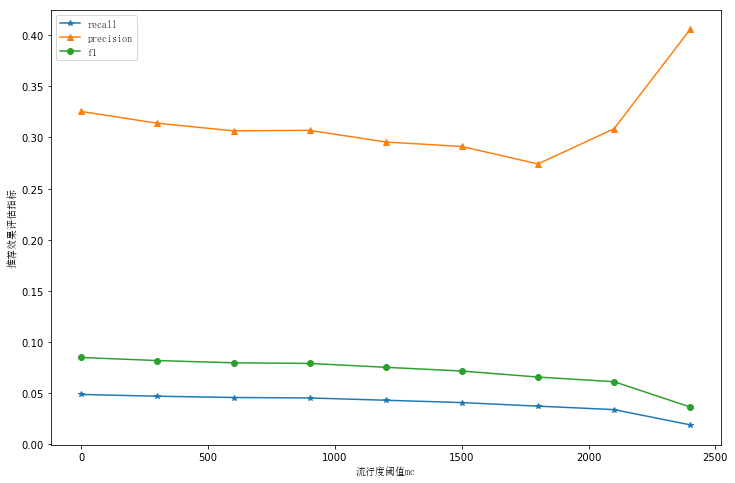

In [38]:

prop = font_manager.FontProperties(fname='/home/wsyj/Downloads/simsun.ttc')
plt.plot(horizontal_coordinates, recall_list, label=u'recall', marker='*')
plt.plot(horizontal_coordinates, precision_list, label=u'precision', marker='^')
plt.plot(horizontal_coordinates, f1_list, label=u'f1', marker='o')
plt.legend( prop=prop )
plt.xlabel(x_label, fontproperties=prop ) 
plt.ylabel(y_label, fontproperties=prop)

# setting graph size
fig = plt.gcf()
fig.set_size_inches(12, 8, forward=True)

plt.show()

In [ ]:
"""Code above is for poking-around purpose. Code below will be more serious."""

In [125]:
graph_count = 0

In [121]:

def draw_graph(table_name, target_index, value_index_list, x_label, y_label, label_list, marker_list, pre=None):
    global graph_count
    
    assert(len(value_index_list) == len(label_list))
    assert(len(label_list) == len(marker_list))
    
    #table_name = 'metrics__chap4_exp_X_mc__N_20___da_1M'

    cur.execute('select * from %s' % (table_name))
    r = cur.fetchall()

    #target_index = 5
    horizontal_coordinates = [x[target_index] for x in r]

    #value_index_list = [-4, -3, -2]
    #precision_list, recall_list, f1_list = ([x[index] for x in r] for index in value_index_list)
    value_list_list = [[x[index] for x in r] for index in value_index_list]
    
    if pre is not None:
        value_list_list = [pre(x) for x in value_list_list]
        horizontal_coordinates = pre(horizontal_coordinates)
    

    #x_label = u'流行度阈值mc'
    #y_label = u'推荐效果评估指标'

    fig1 = plt.figure()
    
    #plt.plot(horizontal_coordinates, recall_list, label=u'recall', marker='*')
    #plt.plot(horizontal_coordinates, precision_list, label=u'precision', marker='^')
    #plt.plot(horizontal_coordinates, f1_list, label=u'f1', marker='o')
    
    ax1 = None
    for value_list, label, marker in zip(value_list_list, label_list, marker_list):
        ax1 = fig1.add_subplot(111)
        ax1.plot(horizontal_coordinates, value_list, label=label, marker=marker)
        
    prop = font_manager.FontProperties(fname='/home/wsyj/Downloads/simsun.ttc')
    
    ax1.legend( prop=prop )
    
    ax1.set_xlabel(x_label, fontproperties=prop ) 
    ax1.set_ylabel(y_label, fontproperties=prop)

    # setting graph size
    fig = plt.gcf()
    fig.set_size_inches(12, 8, forward=True)

    plt.savefig('fig%d__' % (graph_count) + x_label + '__' + y_label + '.png')
    plt.show()
    
    graph_count += 1
    

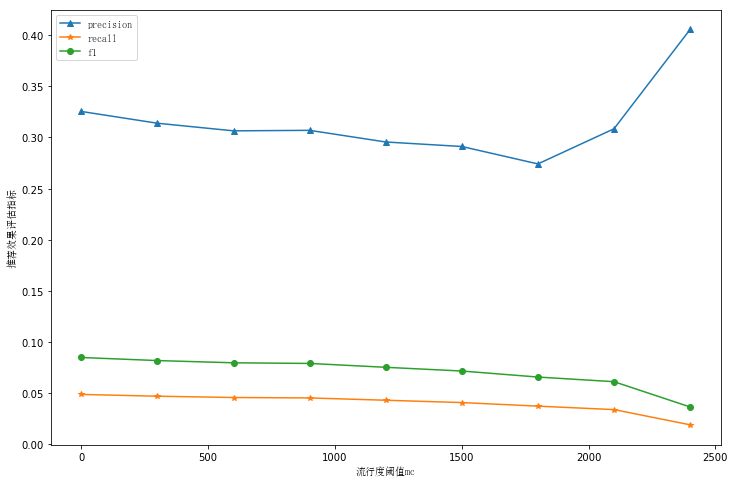

In [115]:

target_index = 5
table_name = 'metrics__chap4_exp_X_mc__N_20___da_1M'
x_label = u'流行度阈值mc'

y_label = u'推荐效果评估指标'
value_index_list = [-4, -3, -2]
label_list = ["precision", "recall", "f1"]
marker_list = ["^", "*", "o"]
draw_graph(table_name, target_index, value_index_list, x_label, y_label, label_list, marker_list)


In [113]:
l = [1, 2, 3]
l[:-1]

[1, 2]

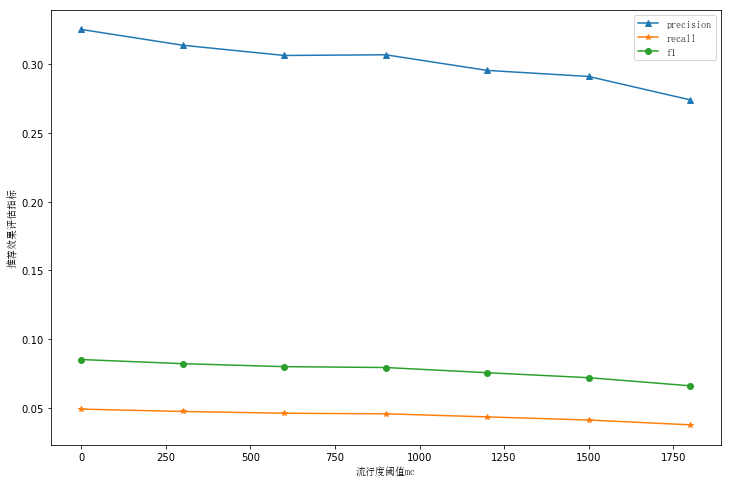

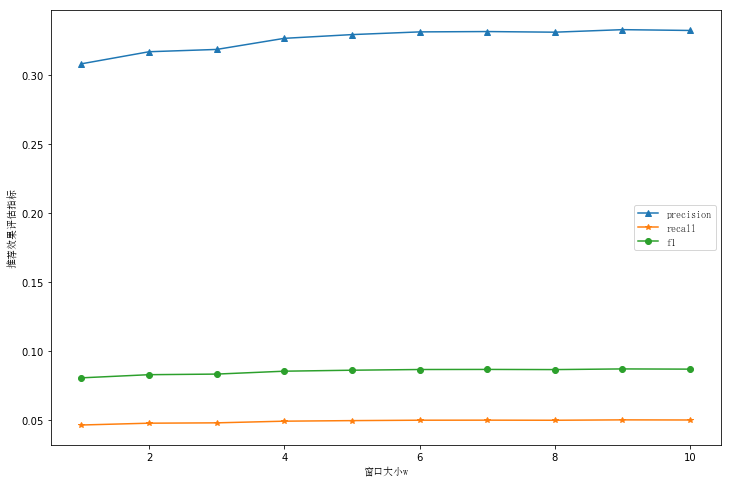

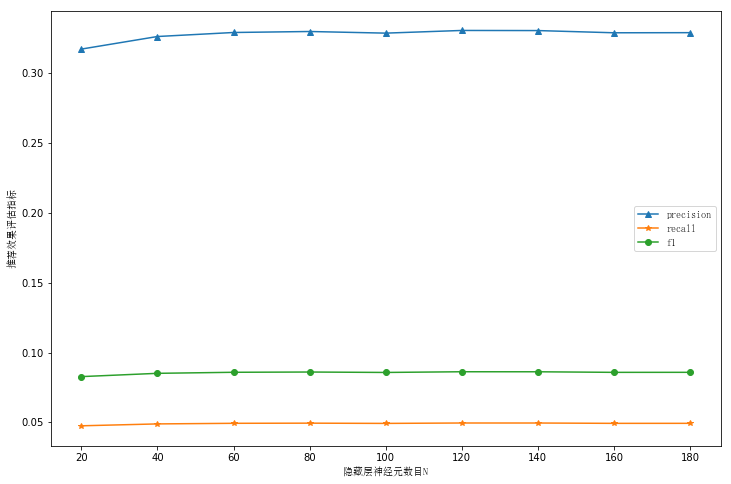

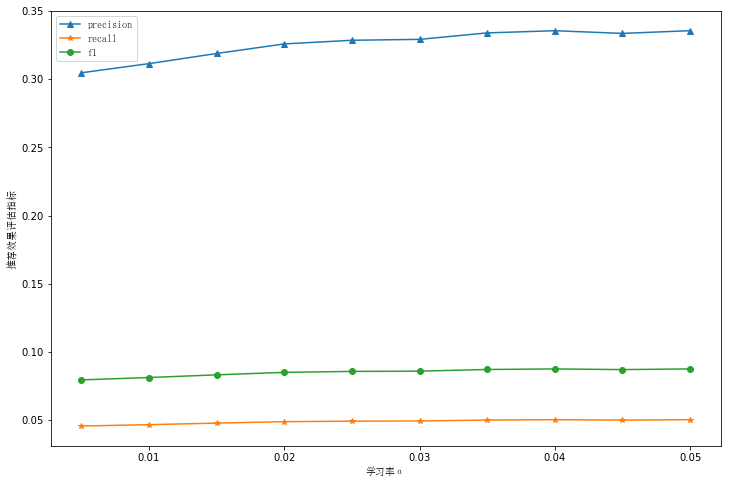

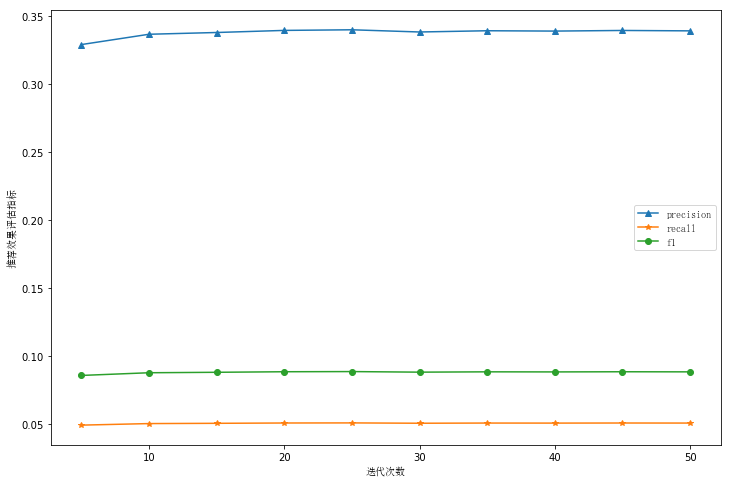

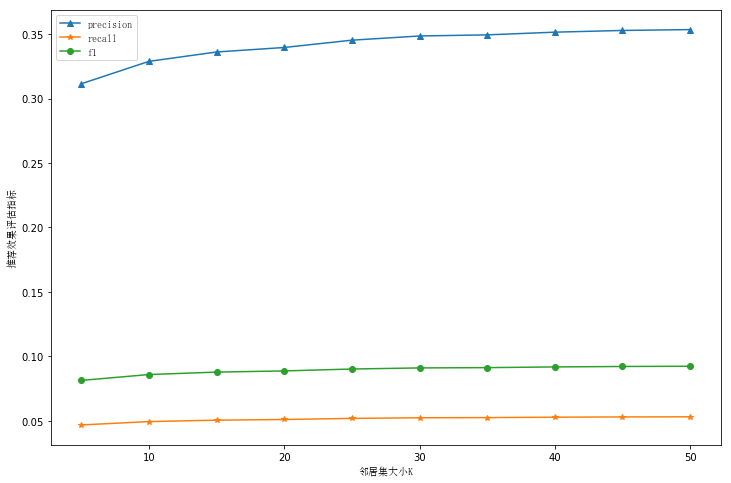

In [126]:
def skip_last_N(n):
    return lambda x: x[:-1 * n]

meta_data = [
    (u'metrics__chap4_exp_X_mc__N_20___da_1M',               5,   u'流行度阈值mc'     , skip_last_N(2)),
    (u'metrics__chap4_exp_X_window__N_20___da_1M',           6,   u'窗口大小w'        , None),
    (u'metrics__chap4_exp_X_size__N_20___da_1M',             7,   u'隐藏层神经元数目N' , None),
    (u'metrics__chap4_exp_X_learning_rate__N_20___da_1M',    8,   u'学习率α'          , None),
    (u'metrics__chap4_exp_X_iter__N_20___da_1M',             9,   u'迭代次数'         , None),
    (u'metrics__chap4_exp_X_K__N_20___da_1M',                10,  u'邻居集大小K'      , None),
]
for one_piece in meta_data:
    table_name, target_index, x_label, pre = one_piece
    
    draw_graph(table_name, target_index, value_index_list, x_label, y_label, label_list, marker_list, pre=pre)


In [81]:
cur.execute('SELECT name FROM sqlite_master')
cur.fetchall()

[(u'tmp',),
 (u'tmp2',),
 (u'metrics',),
 (u'sqlite_sequence',),
 (u'metrics_N_20',),
 (u'metrics_N_20__iter_4__batch_words_1',),
 (u'metrics_N_20__iter_4__batch_words_10000',),
 (u'metrics_N_20__iter_4__batch_words_10000__da_1M',),
 (u'metrics_N_20__iter_5__batch_words_10000__da_1M',),
 (u'metrics_N_20__iter_10__batch_words_10000__da_1M',),
 (u'metrics_N_20__iter_20__batch_words_10000__da_1M',),
 (u'metrics_N_20__iter_40__batch_words_10000__da_1M',),
 (u'metrics_N_20__iter_80__batch_words_10000__da_1M',),
 (u'metrics_N_20__iter_60__batch_words_10000__da_1M',),
 (u'metrics_N_20__iter_30__batch_words_10000__da_1M',),
 (u'metrics_N_20__iter_35__batch_words_10000__da_1M',),
 (u'ttratio__metrics_N_20__iter_35__batch_words_10000__da_1M',),
 (u'ttratio_tiratio__metrics_N_20__iter_35__batch_words_10000__da_1M',),
 (u'metrics__normalized_user_repr__N_20__iter_35__batch_words_10000__da_1M',),
 (u'metrics__normalized_user_repr__N_20__iter_30__batch_words_10000__da_1M',),
 (u'metrics__chap4_exp2_

after padding: {u'\u57fa\u4e8e\u7b80\u5355\u6a21\u578b\u7684\u63a8\u8350\u7b97\u6cd5': {0.5: (-1.0, -1.0, 77.06894207000732), 0.7: (-1.0, -1.0, 157.26934003829956), 0.6: (-1.0, -1.0, 115.61890816688538), 0.8: (-1.0, -1.0, 205.6793510913849)}, u'\u57fa\u4e8e\u5c5e\u6027\u6a21\u578b\u7684\u63a8\u8350\u7b97\u6cd5': {0.5: (-1.0, -1.0, 18.809762954711914), 0.7: (-1.0, -1.0, 25.70901894569397), 0.6: (-1.0, -1.0, 22.06105899810791), 0.8: (-1.0, -1.0, 29.523777961730957)}, u'\u57fa\u4e8e\u795e\u7ecf\u7f51\u7edc\u6a21\u578b\u7684\u63a8\u8350\u7b97\u6cd5': {0.5: (-1.0, -1.0, 14.187434911727905), 0.7: (-1.0, -1.0, 21.71474313735962), 0.6: (-1.0, -1.0, 17.86841106414795), 0.8: (-1.0, -1.0, 25.65867590904236)}, u'\u57fa\u4e8e\u964d\u7ef4\u6a21\u578b\u7684\u63a8\u8350\u7b97\u6cd5': {0.5: (-1.0, -1.0, 44.24010705947876), 0.7: (-1.0, -1.0, 60.32712006568909), 0.6: (-1.0, -1.0, 52.47524094581604), 0.8: (-1.0, -1.0, 69.26027393341064)}}
indexes: [50.0, 60.0, 70.0, 80.0]

[[(-1.0, -1.0, 14.18743491172790

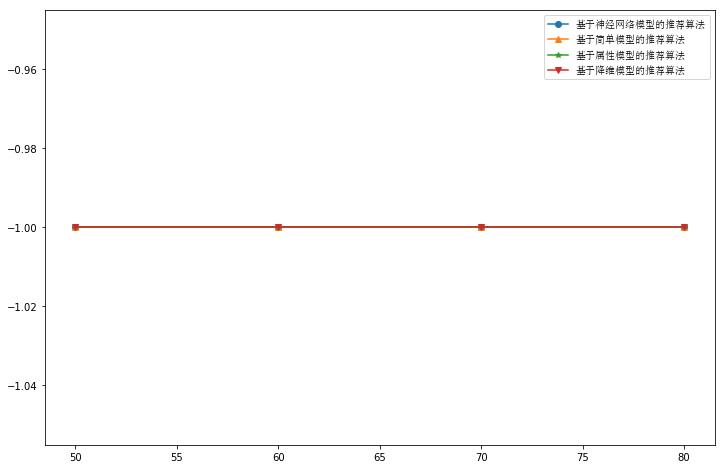

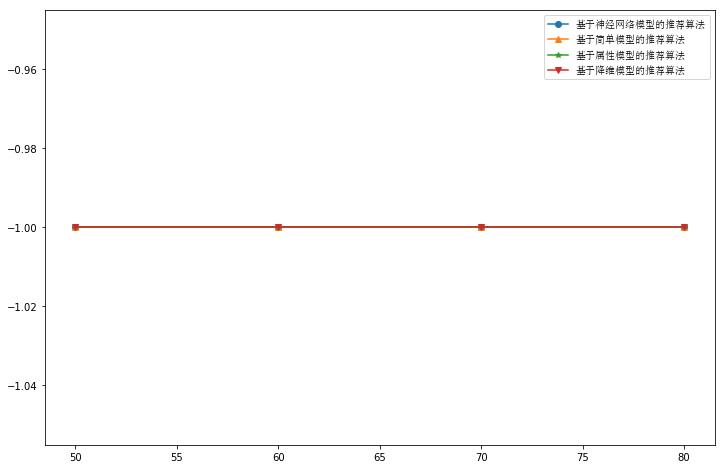

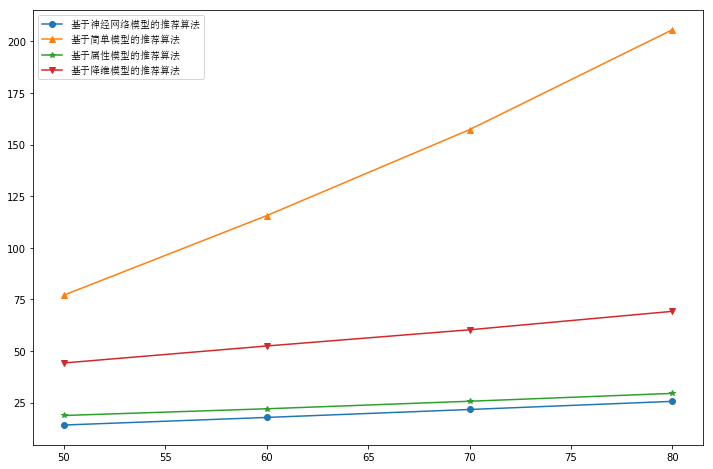

In [111]:
"""
To observe exp result of time complexity exp

The following code is adapted from notebook: chap 4 exp 4 - observe time complexity of various methods - plot exp result.
"""


mn_word2vec = u'基于神经网络模型的推荐算法'
mn_cf = u'基于简单模型的推荐算法'
mn_content_based = u'基于属性模型的推荐算法'
mn_svd = u'基于降维模型的推荐算法'
mn_list = [mn_word2vec, mn_cf, mn_content_based, mn_svd]
marker_list = ['o', '^', '*', 'v']

table_name__word2vec = 'metrics__chap4_exp_X_time_overhead__N_20___da_1M'
table_name__cf = 'metrics__chap4_exp_X_time_overhead__CF__N_20__da_1M'
table_name__svd = 'metrics__chap4_exp_X_time_complexity__SVD__N_20__da_1M'
table_name__content_based = 'metrics__chap4_exp_X_time_complexity__content_based__N_20__da_1M'

table_name_list = [table_name__word2vec, table_name__cf, table_name__content_based, table_name__svd]


time_dict = coll.defaultdict(lambda: coll.defaultdict(list))

all_tp = set()

for mn, table_name in zip(mn_list, table_name_list):
    cur.execute('select * from %s where train_percent >= 0.49' % table_name)
    #cur.execute('select * from %s' % table_name)
    data = cur.fetchall()

    for x in data:
        # tp: train percent
        row_id, s, mc, w, tp, precision, recall, f1, train_overhead, test_overhead, overall_overhead, time = x
        #print '%20s\t%15.9g\t%15.9g\t%15.9g' % (variant, precision, recall, f1)
        #print
        time_dict[mn][tp].append((train_overhead, test_overhead, overall_overhead))
        all_tp.add(tp)
all_tp = list(all_tp)        
all_tp.sort()
        
# calculate average    
time_dict_avg = {}
for mn in time_dict:
    time_dict_avg[mn] = {}
    for tp in time_dict[mn]:
        val = time_dict[mn][tp]
        #print val
        val_len = len(val)
        time_dict_avg[mn][tp] = tuple(  [sum([x[y] for x in val]) * 1. / val_len for y in range(0, len(val[0]))]  )
        
#print time_dict_avg

# padding
for tp in all_tp:
    for mn in time_dict_avg:
        if tp not in time_dict_avg[mn]:
            time_dict_avg[mn][tp] = (np.NaN, np.NaN, np.NaN)
print 'after padding:', time_dict_avg

# plotting
indexes = all_tp
indexes = [(x * 100) for x in indexes]
print 'indexes:', indexes
print
print [[time_dict_avg[mn][tp] for tp in all_tp] for mn in mn_list]

###

time_overhead = ['train', 'test', 'overall']

for index_for_specific_time_overhead, time_overhead in enumerate(time_overhead):
    fig1 = plt.figure()
    ax1 = fig1.add_subplot(111)
    
    
    #values = zip(*[[time_dict_avg[mn][tp][index_for_specific_time_overhead] for tp in all_tp] for mn in mn_list])
    #values = np.array(values)
    #print np.shape(values)
    ##print 'values[0:', values[0]
    #df = pd.DataFrame(values, index=indexes, columns=mn_list)
    #
    #df.plot(marker='o')
    
    
    for mn, marker in zip(mn_list, marker_list):
        values = [time_dict_avg[mn][tp][index_for_specific_time_overhead] for tp in all_tp]
        df = pd.DataFrame(data=values, index=indexes, columns=[u'é'])
        ax1.plot(df, label=mn, marker=marker)

    
    ###
    legend = plt.legend()
    font = font_manager.FontProperties(fname='/home/wsyj/Downloads/simsun.ttc')

    for text in legend.texts:
        text.set_font_properties(font)
    ###
    
    fig = plt.gcf()
    fig.set_size_inches(12, 8, forward=True)

plt.show()



